# 单纯靠score筛选伪标签是不够的
# 伪标签的分布会更加长尾

In [1]:
import argparse
import logging
import os
import os.path as osp

from mmengine.config import Config, DictAction
from mmengine.logging import print_log
from mmengine.registry import RUNNERS
from mmengine.runner import Runner

from mmdet.utils import register_all_modules
from mmengine.registry import DATASETS

register_all_modules()

In [2]:
coco_detection = 'configs/_base_/datasets/coco_detection.py'
cfg = Config.fromfile(coco_detection)

In [3]:
cfg.keys()

dict_keys(['dataset_type', 'data_root', 'file_client_args', 'train_pipeline', 'test_pipeline', 'train_dataloader', 'val_dataloader', 'test_dataloader', 'val_evaluator', 'test_evaluator'])

In [4]:
cfg.train_dataloader.dataset.ann_file


'annotations/instances_train2017.json'

In [5]:
cfg.train_dataloader.dataset.ann_file = '../../../instances_train2017.1@10.json'
cfg.val_dataloader.dataset.pipeline.insert(1, {'type': 'LoadAnnotations', 'with_bbox': True})
train2017 = DATASETS.build(cfg.train_dataloader.dataset)
val2017 = DATASETS.build(cfg.val_dataloader.dataset)

loading annotations into memory...


FileNotFoundError: class `CocoDataset` in mmdet/datasets/coco.py: [Errno 2] No such file or directory: 'data/coco/../../../instances_train2017.1@10.json'

In [6]:
import matplotlib.pyplot as plt

In [6]:
idx = 1
data = train2017[idx]
image = data['inputs'].permute([1,2,0]).numpy()

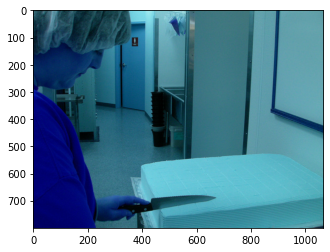

In [7]:
plt.imshow(image)

In [259]:
train2017_cat2num = dict()
train2017_id2cat = train2017.metainfo['CLASSES']
for i in range(len(train2017)):
    for instrance in train2017.get_cat_ids(i):
        if train2017_cat2num.get(train2017_id2cat[instrance]) is None:
            train2017_cat2num[train2017_id2cat[instrance]] = 1
        else:
            train2017_cat2num[train2017_id2cat[instrance]] += 1

val2017_cat2num = dict()
val2017_id2cat = val2017.metainfo['CLASSES']
for i in range(len(val2017)):
    for instrance in val2017.get_cat_ids(i):
        if val2017_cat2num.get(val2017_id2cat[instrance]) is None:
            val2017_cat2num[val2017_id2cat[instrance]] = 1
        else:
            val2017_cat2num[val2017_id2cat[instrance]] += 1          

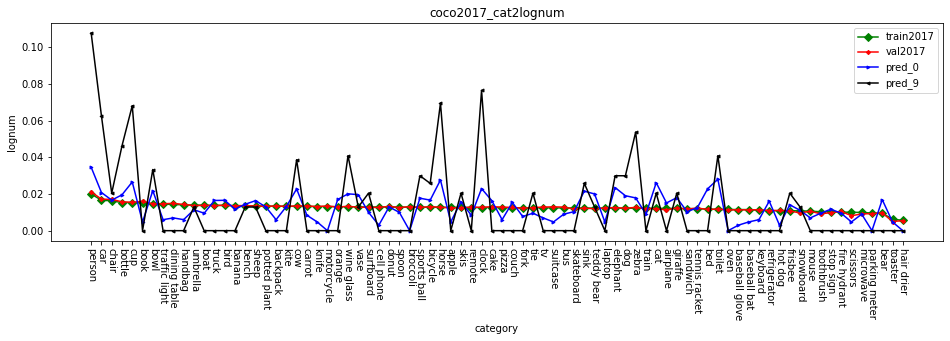

In [260]:
import numpy as np

train2017_cat_list = []
train2017_num_list = []
for cat, num in train2017_cat2num.items():
    train2017_cat_list.append(cat)
    train2017_num_list.append(num)
    
val2017_cat_list = []
val2017_num_list = []
for cat, num in val2017_cat2num.items():
    val2017_cat_list.append(cat)
    val2017_num_list.append(num)  
    
pred_0_cat_list = []
pred_0_num_list = []
for cat, num in pred_cat2num_0.items():
    pred_0_cat_list.append(cat)
    pred_0_num_list.append(num) 
    
pred_5_cat_list = []
pred_5_num_list = []
for cat, num in pred_cat2num_5.items():
    pred_5_cat_list.append(cat)
    pred_5_num_list.append(num) 
    
pred_7_cat_list = []
pred_7_num_list = []
for cat, num in pred_cat2num_7.items():
    pred_7_cat_list.append(cat)
    pred_7_num_list.append(num) 
    
pred_9_cat_list = []
pred_9_num_list = []
for cat, num in pred_cat2num_9.items():
    pred_9_cat_list.append(cat)
    pred_9_num_list.append(num) 
    
sorted_train2017_idx = sorted(range(len(train2017_num_list)), key=lambda k: train2017_num_list[k], reverse=True)
sorted_val2017_idx = sorted(range(len(val2017_num_list)), key=lambda k: val2017_num_list[k], reverse=True)


sorted_train2017_cat_list = [train2017_cat_list[idx] for idx in sorted_train2017_idx]
sorted_train2017_num_list = [train2017_num_list[idx] for idx in sorted_train2017_idx]
sorted_train2017_lognum_list = [np.log(train2017_num_list[idx]) for idx in sorted_train2017_idx]
sorted_train2017_ratio_list = [lognum / sum(sorted_train2017_lognum_list) for lognum in sorted_train2017_lognum_list]

sorted_val2017_cat_list = [val2017_cat_list[val2017_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_val2017_num_list = [val2017_num_list[val2017_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_val2017_lognum_list = [np.log(val2017_num_list[val2017_cat_list.index(cat)]) for cat in sorted_train2017_cat_list]
sorted_val2017_ratio_list = [lognum / sum(sorted_val2017_lognum_list) for lognum in sorted_val2017_lognum_list]

sorted_pred_0_cat_list = [pred_0_cat_list[pred_0_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_0_num_list = [pred_0_num_list[pred_0_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_0_lognum_list = [np.log(pred_0_num_list[pred_0_cat_list.index(cat)]) for cat in sorted_train2017_cat_list]
sorted_pred_0_ratio_list = [lognum / sum(sorted_pred_0_lognum_list) for lognum in sorted_pred_0_lognum_list]

sorted_pred_5_cat_list = [pred_5_cat_list[pred_5_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_5_num_list = [pred_5_num_list[pred_5_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_5_lognum_list = [np.log(pred_5_num_list[pred_5_cat_list.index(cat)]) for cat in sorted_train2017_cat_list]
sorted_pred_5_ratio_list = [lognum / sum(sorted_pred_5_lognum_list) for lognum in sorted_pred_5_lognum_list]

sorted_pred_7_cat_list = [pred_7_cat_list[pred_7_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_7_num_list = [pred_7_num_list[pred_7_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_7_lognum_list = [np.log(pred_7_num_list[pred_7_cat_list.index(cat)]) for cat in sorted_train2017_cat_list]
sorted_pred_7_ratio_list = [lognum / sum(sorted_pred_7_lognum_list) for lognum in sorted_pred_7_lognum_list]

sorted_pred_9_cat_list = [pred_9_cat_list[pred_9_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_9_num_list = [pred_9_num_list[pred_9_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_9_lognum_list = [np.log(pred_9_num_list[pred_9_cat_list.index(cat)]) for cat in sorted_train2017_cat_list]
sorted_pred_9_ratio_list = [lognum / sum(sorted_pred_9_lognum_list) for lognum in sorted_pred_9_lognum_list]


kernel_size = 7
weight = np.ones(kernel_size)
weight = weight / kernel_size
c_sorted_train2017_ratio_list = np.convolve(np.array(sorted_train2017_ratio_list),weight)[kernel_size-1:]
c_sorted_val2017_ratio_list = np.convolve(np.array(sorted_val2017_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_0_ratio_list = np.convolve(np.array(sorted_pred_0_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_5_ratio_list = np.convolve(np.array(sorted_pred_5_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_7_ratio_list = np.convolve(np.array(sorted_pred_7_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_9_ratio_list = np.convolve(np.array(sorted_pred_9_ratio_list),weight)[kernel_size-1:]

plt.figure(figsize=(16, 4))
plt.plot(sorted_train2017_cat_list, sorted_train2017_ratio_list, "g", marker='D', markersize=5, label='train2017')
plt.plot(sorted_train2017_cat_list, sorted_val2017_ratio_list, "r", marker='D', markersize=3, label='val2017')
plt.plot(sorted_train2017_cat_list, sorted_pred_0_ratio_list, "b", marker='>', markersize=3, label='pred_0')
# plt.plot(sorted_train2017_cat_list, c_sorted_pred_5_ratio_list, "y", marker='>', markersize=3, label='pred_5')
# plt.plot(sorted_train2017_cat_list, c_sorted_pred_7_ratio_list, "m", marker='v', markersize=3, label='pred_7')
plt.plot(sorted_train2017_cat_list, sorted_pred_9_ratio_list, "k", marker='<', markersize=3, label='pred_9')


plt.xlabel("category")
plt.ylabel("lognum")
plt.title("coco2017_cat2lognum")
plt.xticks(rotation=270)

plt.legend(loc="upper right")
# plt.savefig("1.jpg")
plt.show()

In [264]:
len(train2017)

11187

In [266]:
len(val2017)

5000

In [263]:
sum(train2017_num_list)

83210

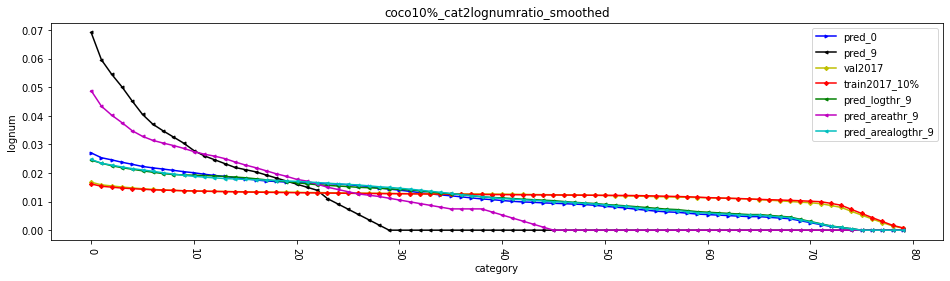

In [276]:
sorted_train2017_idx = sorted(range(len(train2017_num_list)), key=lambda k: train2017_num_list[k], reverse=True)
sorted_val2017_idx = sorted(range(len(val2017_num_list)), key=lambda k: val2017_num_list[k], reverse=True)
sorted_pred_0_idx = sorted(range(len(pred_0_num_list)), key=lambda k: pred_0_num_list[k], reverse=True)
sorted_pred_5_idx = sorted(range(len(pred_5_num_list)), key=lambda k: pred_5_num_list[k], reverse=True)
sorted_pred_7_idx = sorted(range(len(pred_7_num_list)), key=lambda k: pred_7_num_list[k], reverse=True)
sorted_pred_9_idx = sorted(range(len(pred_9_num_list)), key=lambda k: pred_9_num_list[k], reverse=True)

sorted_pred_logthr_9_idx = sorted(range(len(pred_logthr_9_num_list)), key=lambda k: pred_logthr_9_num_list[k], reverse=True)
sorted_pred_areathr_9_idx = sorted(range(len(pred_areathr_9_num_list)), key=lambda k: pred_areathr_9_num_list[k], reverse=True)
sorted_pred_arealogthr_9_idx = sorted(range(len(pred_arealogthr_9_num_list)), key=lambda k: pred_arealogthr_9_num_list[k], reverse=True)

sorted_train2017_lognum_list = [np.log(train2017_num_list[idx]) for idx in sorted_train2017_idx]
sorted_val2017_lognum_list = [np.log(val2017_num_list[idx]) for idx in sorted_val2017_idx]
sorted_pred_0_lognum_list = [np.log(pred_0_num_list[idx]) for idx in sorted_pred_0_idx]
sorted_pred_5_lognum_list = [np.log(pred_5_num_list[idx]) for idx in sorted_pred_5_idx]
sorted_pred_7_lognum_list = [np.log(pred_7_num_list[idx]) for idx in sorted_pred_7_idx]
sorted_pred_9_lognum_list = [np.log(pred_9_num_list[idx]) for idx in sorted_pred_9_idx]

sorted_pred_logthr_9_lognum_list = [np.log(pred_logthr_9_num_list[idx]) for idx in sorted_pred_logthr_9_idx]
sorted_pred_areathr_9_lognum_list = [np.log(pred_areathr_9_num_list[idx]) for idx in sorted_pred_areathr_9_idx]
sorted_pred_arealogthr_9_lognum_list = [np.log(pred_arealogthr_9_num_list[idx]) for idx in sorted_pred_arealogthr_9_idx]

sorted_train2017_ratio_list = [lognum / sum(sorted_train2017_lognum_list) for lognum in sorted_train2017_lognum_list]
sorted_val2017_ratio_list = [lognum / sum(sorted_val2017_lognum_list) for lognum in sorted_val2017_lognum_list]
sorted_pred_0_ratio_list = [lognum / sum(sorted_pred_0_lognum_list) for lognum in sorted_pred_0_lognum_list]
sorted_pred_5_ratio_list = [lognum / sum(sorted_pred_5_lognum_list) for lognum in sorted_pred_5_lognum_list]
sorted_pred_7_ratio_list = [lognum / sum(sorted_pred_7_lognum_list) for lognum in sorted_pred_7_lognum_list]
sorted_pred_9_ratio_list = [lognum / sum(sorted_pred_9_lognum_list) for lognum in sorted_pred_9_lognum_list]

sorted_pred_logthr_9_ratio_list = [lognum / sum(sorted_pred_logthr_9_lognum_list) for lognum in sorted_pred_logthr_9_lognum_list]
sorted_pred_areathr_9_ratio_list = [lognum / sum(sorted_pred_areathr_9_lognum_list) for lognum in sorted_pred_areathr_9_lognum_list]
sorted_pred_arealogthr_9_ratio_list = [lognum / sum(sorted_pred_arealogthr_9_lognum_list) for lognum in sorted_pred_arealogthr_9_lognum_list]

kernel_size = 7
weight = np.ones(kernel_size)
weight = weight / kernel_size
c_sorted_train2017_ratio_list = np.convolve(np.array(sorted_train2017_ratio_list),weight)[kernel_size-1:]
c_sorted_val2017_ratio_list = np.convolve(np.array(sorted_val2017_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_0_ratio_list = np.convolve(np.array(sorted_pred_0_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_5_ratio_list = np.convolve(np.array(sorted_pred_5_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_7_ratio_list = np.convolve(np.array(sorted_pred_7_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_9_ratio_list = np.convolve(np.array(sorted_pred_9_ratio_list),weight)[kernel_size-1:]

c_sorted_pred_logthr_9_ratio_list = np.convolve(np.array(sorted_pred_logthr_9_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_areathr_9_ratio_list = np.convolve(np.array(sorted_pred_areathr_9_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_arealogthr_9_ratio_list = np.convolve(np.array(sorted_pred_arealogthr_9_ratio_list),weight)[kernel_size-1:]

x = list(range(len(sorted_pred_0_num_list)))
plt.figure(figsize=(16, 4))
# 

# val2017 longer-tail than train2017
plt.plot(x, c_sorted_pred_0_ratio_list, "b", marker='>', markersize=3, label='pred_0')
# plt.plot(x, c_sorted_pred_5_ratio_list, "g", marker='>', markersize=3, label='pred_5')
# plt.plot(x, c_sorted_pred_7_ratio_list, "y", marker='v', markersize=3, label='pred_7')
plt.plot(x, c_sorted_pred_9_ratio_list, "k", marker='<', markersize=3, label='pred_9')

plt.plot(x, c_sorted_val2017_ratio_list, "y", marker='D', markersize=3, label='val2017')
plt.plot(x, c_sorted_train2017_ratio_list, "r", marker='D', markersize=3, label='train2017_10%')

plt.plot(x, c_sorted_pred_logthr_9_ratio_list, "g", marker='<', markersize=3, label='pred_logthr_9')
plt.plot(x, c_sorted_pred_areathr_9_ratio_list, "m", marker='<', markersize=3, label='pred_areathr_9')
plt.plot(x, c_sorted_pred_arealogthr_9_ratio_list, "c", marker='<', markersize=3, label='pred_arealogthr_9')

plt.xlabel("category")
plt.ylabel("lognum")
plt.title("coco10%_cat2lognumratio_smoothed")
plt.xticks(rotation=270)

plt.legend(loc="upper right")
# plt.savefig("1.jpg")
plt.show()


In [819]:
print(sum(pred_arealogthr_9_num_list))
print(sum(pred_areathr_9_num_list))
print(sum(pred_logthr_9_num_list))
print(sum(pred_9_num_list))

51647

In [11]:
from mmdet.apis import init_detector, inference_detector
import mmcv

# 指定模型的配置文件和 checkpoint 文件路径
config_file = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '../iter_180000.pth'

# 根据配置文件和 checkpoint 文件构建模型
model = init_detector(config_file, checkpoint_file, device='cuda:0')

local loads checkpoint from path: ../iter_180000.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

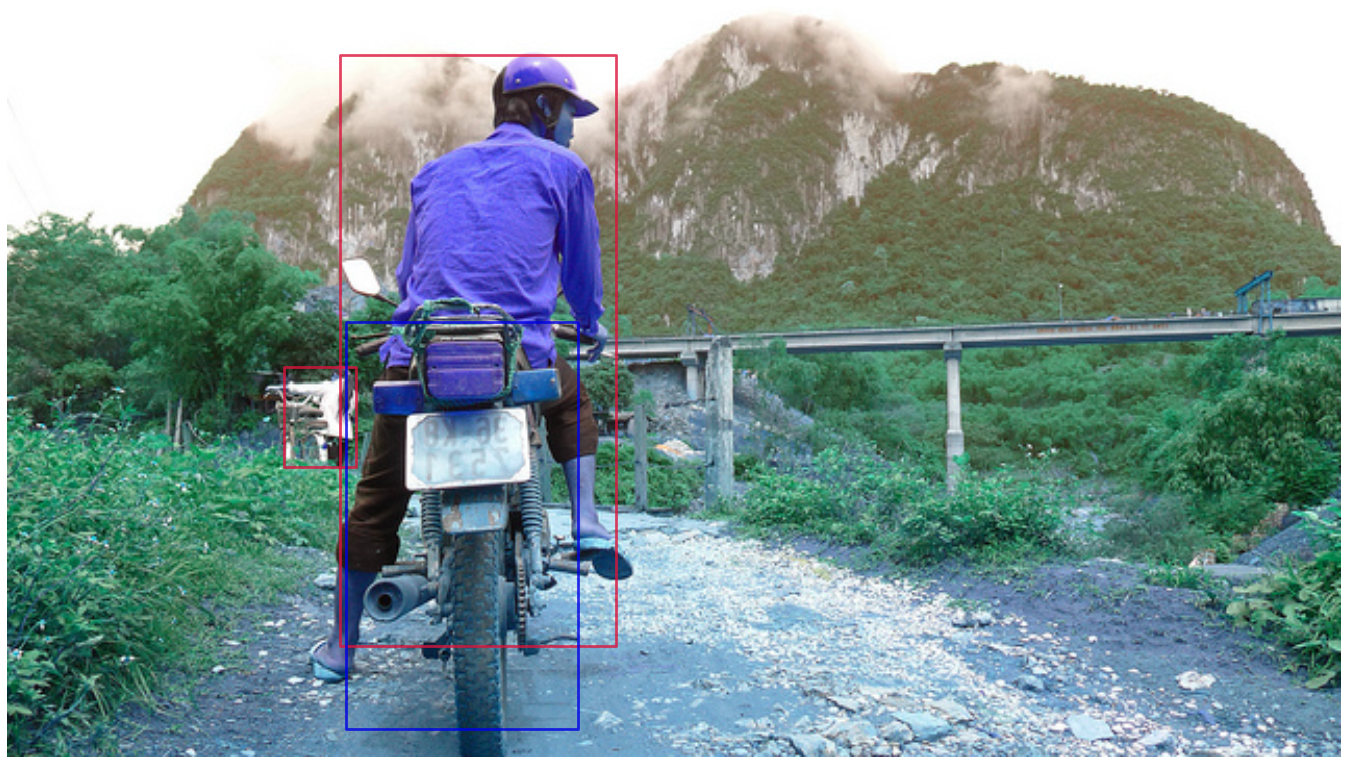

In [152]:
from mmdet.visualization import DetLocalVisualizer

visualizer = DetLocalVisualizer()
visualizer.dataset_meta = val2017.metainfo

visualizer.add_datasample('image', img, results)

In [12]:
results_list = []
for i in range(len(val2017)):
    data = val2017[i]
    results_list.append(inference_detector(model, data['inputs'].permute([1,2,0]).numpy()))
    print('\r{}/{}'.format(i,len(val2017)), end='')
    

C:\Users\czm22\AppData\Roaming\Python\Python39\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


4999/5000

In [13]:
pred_cat2num_0 = dict()
pred_cat2num_5 = dict()
pred_cat2num_7 = dict()
pred_cat2num_9 = dict()

for k in val2017_cat2num.keys():
    pred_cat2num_0[k] = 1
    pred_cat2num_5[k] = 1
    pred_cat2num_7[k] = 1
    pred_cat2num_9[k] = 1

for results in results_list:
    for label in results.pred_instances.labels:
        pred_cat2num_0[val2017_id2cat[int(label.cpu())]] += 1

for results in results_list:
    labels = results.pred_instances.labels[results.pred_instances.scores > 0.5]
    for label in labels:
        pred_cat2num_5[val2017_id2cat[int(label.cpu())]] += 1

for results in results_list:
    labels = results.pred_instances.labels[results.pred_instances.scores > 0.7]
    for label in labels:
        pred_cat2num_7[val2017_id2cat[int(label.cpu())]] += 1
            
for results in results_list:
    labels = results.pred_instances.labels[results.pred_instances.scores > 0.9]
    for label in labels:
        pred_cat2num_9[val2017_id2cat[int(label.cpu())]] += 1

In [333]:
pred_cat2score = dict()

for k in val2017_cat2num.keys():
    pred_cat2score[k] = []

for results in results_list:
    labels = results.pred_instances.labels
    scores = results.pred_instances.scores
    for i in range(len(labels)):
        pred_cat2score[val2017_id2cat[int(labels[i].cpu())]].append(float(scores[i].cpu()))

In [340]:
pred_cat2scoremean = dict()
pred_cat2scoremax = dict()
pred_cat2scoremin = dict()

for k,v in pred_cat2score.items():
    score = np.array(v)
    mean = score.mean()
    std = score.std()
    pred_cat2scoremean[k] = mean
    pred_cat2scoremax[k] = mean + std
    pred_cat2scoremin[k] = mean - std

In [341]:
pred_cat2scoremean_list = [pred_cat2scoremean[cat] for cat in sorted_train2017_cat_list] 
pred_cat2scoremax_list = [pred_cat2scoremax[cat] for cat in sorted_train2017_cat_list] 
pred_cat2scoremin_list = [pred_cat2scoremin[cat] for cat in sorted_train2017_cat_list] 

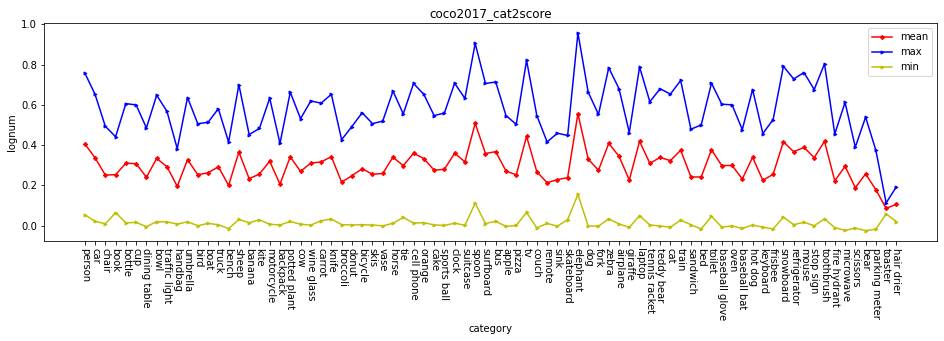

In [343]:
plt.figure(figsize=(16, 4))
plt.plot(sorted_train2017_cat_list, pred_cat2scoremean_list, "r", marker='D', markersize=3, label='mean')
plt.plot(sorted_train2017_cat_list, pred_cat2scoremax_list, "b", marker='>', markersize=3, label='max')
plt.plot(sorted_train2017_cat_list, pred_cat2scoremin_list, "y", marker='>', markersize=3, label='min')


plt.xlabel("category")
plt.ylabel("lognum")
plt.title("coco2017_cat2score")
plt.xticks(rotation=270)

plt.legend(loc="upper right")
# plt.savefig("1.jpg")
plt.show()

In [31]:
num_9_ratio = [num/sum(sorted_pred_9_num_list) for num in sorted_pred_9_num_list]
lognum_9_ratio = [lognum/sum(sorted_pred_9_lognum_list)+1e-3 for lognum in sorted_pred_9_lognum_list]

thr_9 = [0.9 * ratio / max(num_9_ratio) for ratio in num_9_ratio]
logthr_9 = [0.9 * ratio / max(lognum_9_ratio) for ratio in lognum_9_ratio]

pred_cat2num_logthr_9 = dict()
for k in val2017_cat2num.keys():
    pred_cat2num_logthr_9[k] = 1
    
for results in results_list:
    labels = results.pred_instances.labels
    scores = results.pred_instances.scores
    for i in range(len(labels)):
        if scores[i] > logthr_9[sorted_train2017_cat_list.index(train2017_id2cat[int(labels[i].cpu())])]:
            pred_cat2num_logthr_9[val2017_id2cat[int(labels[i].cpu())]] += 1
            
pred_logthr_9_cat_list = []
pred_logthr_9_num_list = []
for cat, num in pred_cat2num_logthr_9.items():
    pred_logthr_9_cat_list.append(cat)
    pred_logthr_9_num_list.append(num) 
    

In [32]:
pred_cat2num_arealogthr_9 = dict()
for k in val2017_cat2num.keys():
    pred_cat2num_arealogthr_9[k] = 1
    
for i in range(len(val2017)):
    labels = results_list[i].pred_instances.labels.cpu().numpy()
    scores = results_list[i].pred_instances.scores.cpu().numpy()
    bboxes = results_list[i].pred_instances.bboxes.cpu().numpy()
    img_shape = val2017[i]['data_sample'].img_shape
    bbox_areas = (bboxes[:, 2] - bboxes[:, 0]) * (bboxes[:, 3] - bboxes[:, 1])
    img_area = img_shape[0] * img_shape[1]
    areas = bbox_areas / img_area
    for i in range(len(labels)):
        if scores[i] > logthr_9[sorted_train2017_cat_list.index(train2017_id2cat[int(labels[i])])] * np.sin(areas[i] + np.pi/2 - 1):
            pred_cat2num_arealogthr_9[val2017_id2cat[int(labels[i])]] += 1
            
pred_arealogthr_9_cat_list = []
pred_arealogthr_9_num_list = []
for cat, num in pred_cat2num_arealogthr_9.items():
    pred_arealogthr_9_cat_list.append(cat)
    pred_arealogthr_9_num_list.append(num) 

In [ ]:
pred_cat2num_areathr_9 = dict()
areathr_9 = 0.9 * area_ratios

In [36]:
area_ratios_list = []
labels_list = []
scores_list = []

for i in range(len(val2017)):
    data_sample = val2017[i]['data_sample']
    results = results_list[i]  
    bboxes = results.pred_instances.bboxes.cpu().numpy()
    labels = results.pred_instances.labels.cpu().numpy()
    scores = results.pred_instances.scores.cpu().numpy()
    bbox_areas = (bboxes[:, 2] - bboxes[:, 0]) * (bboxes[:, 3] - bboxes[:, 1])
    img_area = data_sample.img_shape[0] * data_sample.img_shape[1]
    area_ratios = bbox_areas / img_area
    area_ratios_list.append(area_ratios)
    labels_list.append(labels)
    scores_list.append(scores)
    
area_array = np.concatenate(area_ratios_list)
label_array = np.concatenate(labels_list)
score_array = np.concatenate(scores_list)

idx = np.argsort(area_array)

area_array = area_array[idx]
label_array = label_array[idx]
score_array = score_array[idx]

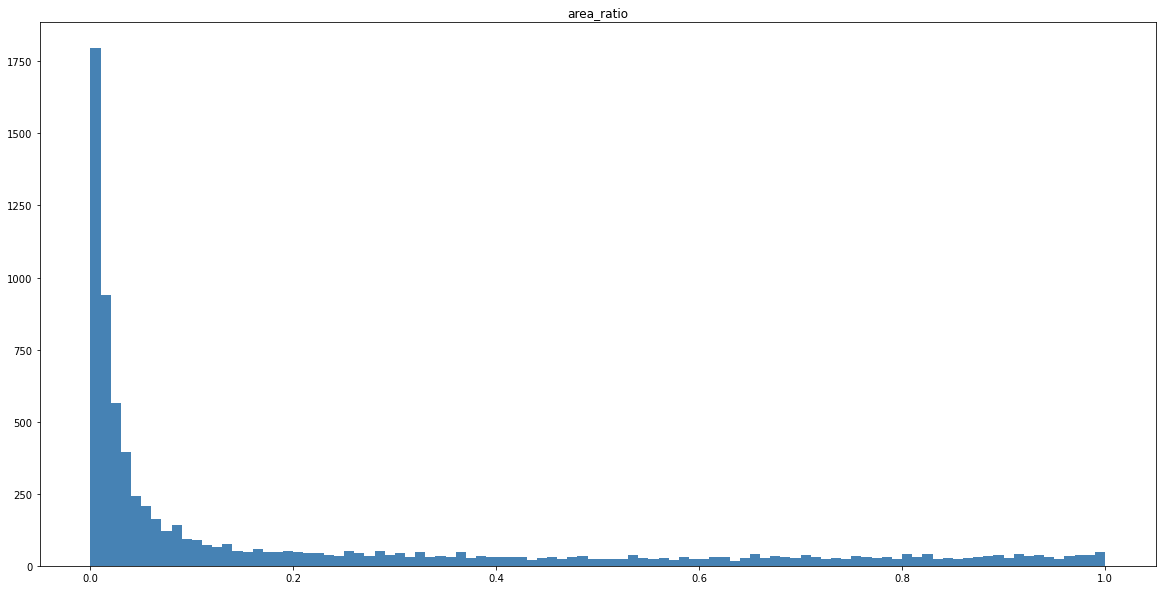

In [37]:
plt.figure(figsize=(20,10))
fre_tuple = plt.hist(area_array, bins=100, color='steelblue')
plt.title('area_ratio')
plt.show()


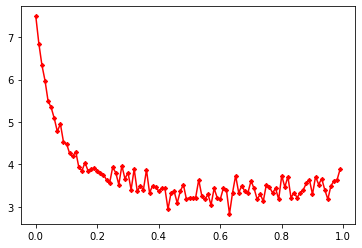

In [38]:
plt.plot(fre_tuple[1][:-1], np.log(fre_tuple[0]), "r", marker='D', markersize=3, label='mean')

Text(0.5, 1.0, 'coco2017_area2score_0')

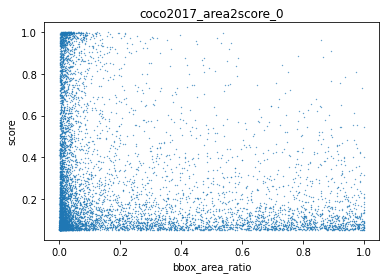

In [39]:
plt.scatter(area_array, score_array, s=0.1)
plt.xlabel("bbox_area_ratio")
plt.ylabel("score")
plt.title("coco2017_area2score_0")

In [40]:
bin_num = 20
max_area = 1
score_mean = []
score_min =[]
score_max = []

for j in range(bin_num):
    area_inds = ((j/bin_num*max_area) < area_array ) & (area_array < ((j+1)/bin_num*max_area))
    area_scores = score_array[area_inds]
    area_scores_mean = area_scores.mean()
    area_scores_std = area_scores.std()
    score_mean.append(area_scores_mean)
    score_max.append(area_scores_mean+area_scores_std)
    score_min.append(area_scores_mean-area_scores_std)

kernel_size = 5
weight = np.ones(kernel_size)
weight = weight / kernel_size

c_score_mean = np.convolve(np.array(score_mean),weight)[:-kernel_size+1]
c_score_max = np.convolve(np.array(score_max),weight)[:-kernel_size+1]
c_score_min = np.convolve(np.array(score_min),weight)[:-kernel_size+1]

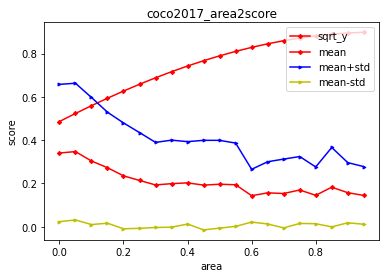

In [41]:
x = [b/bin_num*max_area for b in range(bin_num)]
smin = score_array.mean()
smax = 0.9
x = np.array([b/bin_num*max_area for b in range(bin_num)])
sy = (smax - smin)*x + smin
sy = 0.9 * np.sin(x+np.pi/2-1)

# plt.plot(x, x, "r", marker='D', markersize=3, label='linear')
# plt.plot(x, sy, "r", marker='D', markersize=3, label='linear_y')
plt.plot(x, sy, "r", marker='D', markersize=3, label='sqrt_y')

plt.plot(x, score_mean, "r", marker='D', markersize=3, label='mean')
plt.plot(x, score_max, "b", marker='>', markersize=3, label='mean+std')
plt.plot(x, score_min, "y", marker='>', markersize=3, label='mean-std')


plt.xlabel("area")
plt.ylabel("score")
plt.title("coco2017_area2score")


plt.legend(loc="upper right")
# plt.savefig("1.jpg")
plt.show()

In [42]:
areaRng = [[0 ** 2, 1e5 ** 2], [0 ** 2, 32 ** 2], [32 ** 2, 96 ** 2], [96 ** 2, 1e5 ** 2]]
print(areaRng)

[[0, 10000000000.0], [0, 1024], [1024, 9216], [9216, 10000000000.0]]


In [43]:
area_array.shape

(7853,)

In [44]:
area_array

array([6.50461785e-07, 8.78147273e-07, 1.95374356e-06, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [45]:
smin = score_array.mean()
smax = 0.9
x = np.array([b/bin_num*max_area for b in range(bin_num)])
# areathr = (smax - smin)*area_array + smin
# areathr = np.sqrt((smax - smin)*area_array + smin)

areathr = 0.9 * np.sin(area_array + np.pi/2 - 1)

In [46]:
sum(score_array > areathr)

1450

In [47]:
label_array[score_array > areathr]

array([ 0, 32, 32, ..., 20, 61,  0], dtype=int64)

In [48]:

pred_cat2num_areathr_9 = dict()

for k in val2017_cat2num.keys():
    pred_cat2num_areathr_9[k] = 1

for label in label_array[score_array > areathr]:
    pred_cat2num_areathr_9[val2017_id2cat[int(label)]] += 1

pred_areathr_9_cat_list = []
pred_areathr_9_num_list = []
for cat, num in pred_cat2num_areathr_9.items():
    pred_areathr_9_cat_list.append(cat)
    pred_areathr_9_num_list.append(num)

In [51]:
import copy

val2017_score_list = []
val2017_iou_list = []
val2017_logthr_9_score_list = []
val2017_areathr_9_score_list = []
val2017_arealogthr_9_score_list = []
val2017_label_list = []

bias = 2000
for i in range(len(val2017)):
    if len(results_list[i].pred_instances) == 0:
        continue
    if len(val2017[i]['data_sample'].gt_instances) == 0:
        continue
    pred_labels = results_list[i].pred_instances.labels.cpu().numpy()
    pred_scores = results_list[i].pred_instances.scores.cpu().numpy()
    pred_bboxes = results_list[i].pred_instances.bboxes.cpu().numpy()
    data_sample = val2017[i]['data_sample']
    gt_labels = data_sample.gt_instances.labels.numpy()
    gt_bboxes = data_sample.gt_instances.bboxes.numpy()
    
    pred_areas = (pred_bboxes[:, 2] - pred_bboxes[:, 0]) * (pred_bboxes[:, 3] - pred_bboxes[:, 1])
    gt_areas = (gt_bboxes[:, 2] - gt_bboxes[:, 0]) * (gt_bboxes[:, 3] - gt_bboxes[:, 1])
    img_area = data_sample.img_shape[0] * data_sample.img_shape[1]
    
    logthr_9_scores = copy.deepcopy(pred_scores)
    areathr_9_scores = copy.deepcopy(pred_scores)
    
    
    areathr_9_scores /= np.sin(pred_areas/img_area + np.pi/2 - 1)
    arealogthr_9_scores = copy.deepcopy(areathr_9_scores)
    
    for cat in range(len(val2017_id2cat)):
        pred_bboxes[pred_labels == cat] += bias * cat
        gt_bboxes[gt_labels == cat] += bias * cat
        logthr_9_scores[pred_labels == cat] /= (logthr_9[sorted_train2017_cat_list.index(train2017_id2cat[cat])] / 0.9)
        arealogthr_9_scores[pred_labels == cat] /= (logthr_9[sorted_train2017_cat_list.index(train2017_id2cat[cat])] / 0.9)
        
        
    left_top = np.maximum(pred_bboxes[:, None, :2], gt_bboxes[:, :2])
    right_bottom = np.minimum(pred_bboxes[:, None, 2:], gt_bboxes[:, 2:])
    wh = np.maximum(right_bottom - left_top, 0)
    inter_areas = wh[:, :, 0] * wh[:, :, 1]
    ious = inter_areas / (pred_areas[:, np.newaxis] + gt_areas[np.newaxis, :] - inter_areas + 1e-7)
    iou = np.max(ious, axis=-1)
    val2017_score_list.append(pred_scores)
    val2017_iou_list.append(iou)
    val2017_label_list.append(pred_labels)
    
    val2017_logthr_9_score_list.append(logthr_9_scores)
    val2017_areathr_9_score_list.append(areathr_9_scores)
    val2017_arealogthr_9_score_list.append(arealogthr_9_scores)

val2017_scores = np.concatenate(val2017_score_list)
val2017_ious = np.concatenate(val2017_iou_list)
val2017_labels = np.concatenate(val2017_label_list)

val2017_logthr_9_scores = np.concatenate(val2017_logthr_9_score_list)
val2017_areathr_9_scores = np.concatenate(val2017_areathr_9_score_list)
val2017_arealogthr_9_scores = np.concatenate(val2017_arealogthr_9_score_list)

In [156]:
thr = 0.9
print(thr)
print(len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))
thr = 0.7
print(thr)
print(len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))
thr = 0.5
print(thr)
print(len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))
thr = 0.3
print(thr)
print(len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))

0.9
588
467
0.79421768707483
0.18642714570858285
0.7
1087
745
0.6853725850965962
0.29740518962075846
0.5
1606
1004
0.6251556662515566
0.40079840319361276
0.3
2432
1337
0.5497532894736842
0.5337325349301397


In [181]:
unique,count=np.unique(val2017_labels,return_counts=True)
sorted_val2017_pred_id_list = unique[np.argsort(-count)]

tail_inds = np.array([False] * len(val2017_labels))
for _id in sorted_val2017_id_list[10:]:
    valid_inds = val2017_labels == _id
    tail_inds = tail_inds | valid_inds

In [ ]:
Precision = tp/tp+fp
 
Recall = tp/tp+fn
 
进而计算得到：
 
F1score = 2 * Precision * Recall /（Precision + Recall）

In [227]:
for thr in [0, 0.5, 0.7, 0.9]:
    print(thr)

    Precision = len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr)])
    Recall = len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)])
    F1score = 2 * Precision * Recall /(Precision + Recall)
    print(F1score)

0
0.48443241152581706
0.5
0.48844563366577465
0.7
0.4148106904231626
0.9
0.3019721952796638


In [229]:
for thr in [0, 0.5, 0.7, 0.9]:
    print(thr)
    Precision = len(val2017_labels[(val2017_logthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_logthr_9_scores > thr)])
    Recall = len(val2017_labels[(val2017_logthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)])
    F1score = 2 * Precision * Recall /(Precision + Recall)
    print(F1score)

0
0.48443241152581706
0.5
0.4437720625315179
0.7
0.41680863145939806
0.9
0.3608832807570978


In [230]:
for thr in [0, 0.5, 0.7, 0.9]:
    print(thr)
    Precision = len(val2017_labels[(val2017_areathr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_areathr_9_scores > thr)])
    Recall = len(val2017_labels[(val2017_areathr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)])
    F1score = 2 * Precision * Recall /(Precision + Recall)
    print(F1score)

0
0.48443241152581706
0.5
0.5359449885392791
0.7
0.509530450953045
0.9
0.47040971168437024


In [231]:
for thr in [0, 0.5, 0.7, 0.9]:
    print(thr)
    Precision = len(val2017_labels[(val2017_arealogthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_arealogthr_9_scores > thr)])
    Recall = len(val2017_labels[(val2017_arealogthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)])
    F1score = 2 * Precision * Recall /(Precision + Recall)
    print(F1score)

0
0.48443241152581706
0.5
0.4647450110864745
0.7
0.458005249343832
0.9
0.4415584415584416


In [228]:
thr = 0.9
print(thr)

Precision = len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr)])
Recall = len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)])
F1score = 2 * Precision * Recall /(Precision + Recall)
print(F1score)

thr = 0.9
print(thr)
Precision = len(val2017_labels[(val2017_logthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_logthr_9_scores > thr)])
Recall = len(val2017_labels[(val2017_logthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)])
F1score = 2 * Precision * Recall /(Precision + Recall)
print(F1score)

thr = 0.9
print(thr)
Precision = len(val2017_labels[(val2017_areathr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_areathr_9_scores > thr)])
Recall = len(val2017_labels[(val2017_areathr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)])
F1score = 2 * Precision * Recall /(Precision + Recall)
print(F1score)

thr = 0.5
print(thr)
Precision = len(val2017_labels[(val2017_arealogthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_arealogthr_9_scores > thr)])
Recall = len(val2017_labels[(val2017_arealogthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)])
F1score = 2 * Precision * Recall /(Precision + Recall)
print(F1score)

0.9
0.3019721952796638
0.9
0.3608832807570978
0.9
0.47040971168437024
0.5
0.4647450110864745


In [211]:
thr = 0.9
print(thr)

Precision = len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr)])
Recall = len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)])
F1score = 2 * Precision * Recall /（Precision + Recall）

print(len(val2017_labels[(val2017_scores > thr) & tail_inds]))
print(len(val2017_labels[(val2017_scores > thr) & tail_inds & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_scores > thr) & tail_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr) & tail_inds]))
print(len(val2017_labels[(val2017_scores > thr) & tail_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5) & tail_inds]))


thr = 0.15
print(thr)

print(len(val2017_labels[(val2017_scores > thr) & tail_inds]))
print(len(val2017_labels[(val2017_scores > thr) & tail_inds & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_scores > thr) & tail_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr) & tail_inds]))
print(len(val2017_labels[(val2017_scores > thr) & tail_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5) & tail_inds]))


thr = 0.9
print(thr)
print(len(val2017_labels[(val2017_logthr_9_scores > thr) & tail_inds]))
print(len(val2017_labels[(val2017_logthr_9_scores > thr) & tail_inds & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_logthr_9_scores > thr) & tail_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_logthr_9_scores > thr) & tail_inds]))
print(len(val2017_labels[(val2017_logthr_9_scores > thr) & tail_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5) & tail_inds]))

thr = 1.2
print(thr)
print(len(val2017_labels[(val2017_arealogthr_9_scores > thr) & tail_inds]))
print(len(val2017_labels[(val2017_arealogthr_9_scores > thr) & tail_inds & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_arealogthr_9_scores > thr) & tail_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_arealogthr_9_scores > thr) & tail_inds]))
print(len(val2017_labels[(val2017_arealogthr_9_scores > thr) & tail_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5) & tail_inds]))


0.9
177
107
0.6045197740112994
0.17483660130718953
0.15
1708
428
0.2505854800936768
0.6993464052287581
0.9
1664
416
0.25
0.6797385620915033
1.2
1772
445
0.25112866817155755
0.7271241830065359


In [212]:
thr = 0.9
print(thr)

main_inds = ~tail_inds
print(len(val2017_labels[(val2017_scores > thr) & main_inds]))
print(len(val2017_labels[(val2017_scores > thr) & main_inds & (val2017_ious > 0.5)]))
print(1 - len(val2017_labels[(val2017_scores > thr) & main_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr) & main_inds]))
print(len(val2017_labels[(val2017_scores > thr) & main_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5) & main_inds]))


thr = 0.9
print(thr)
print(len(val2017_labels[(val2017_logthr_9_scores > thr) & main_inds]))
print(len(val2017_labels[(val2017_logthr_9_scores > thr) & main_inds & (val2017_ious > 0.5)]))
print(1 - len(val2017_labels[(val2017_logthr_9_scores > thr) & main_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_logthr_9_scores > thr) & main_inds]))
print(len(val2017_labels[(val2017_logthr_9_scores > thr) & main_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5) & main_inds]))

thr = 0.9
print(thr)
print(len(val2017_labels[(val2017_arealogthr_9_scores > thr) & main_inds]))
print(len(val2017_labels[(val2017_arealogthr_9_scores > thr) & main_inds & (val2017_ious > 0.5)]))
print(1 - len(val2017_labels[(val2017_arealogthr_9_scores > thr) & main_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_arealogthr_9_scores > thr) & main_inds]))
print(len(val2017_labels[(val2017_arealogthr_9_scores > thr) & main_inds & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5) & main_inds]))


0.9
411
360
0.12408759124087587
0.1901743264659271
0.9
586
442
0.24573378839590443
0.2334918119387216
0.9
1089
768
0.29476584022038566
0.40570522979397783


In [90]:
thr = 0.3
print(thr)

print(len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))

thr = 0.9
print(thr)
print(len(val2017_labels[(val2017_logthr_9_scores > thr)]))
print(len(val2017_labels[(val2017_logthr_9_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_logthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_logthr_9_scores > thr)]))
print(len(val2017_labels[(val2017_logthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))

print(len(val2017_labels[(val2017_areathr_9_scores > thr)]))
print(len(val2017_labels[(val2017_areathr_9_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_areathr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_areathr_9_scores > thr)]))
print(len(val2017_labels[(val2017_areathr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))

print(len(val2017_labels[(val2017_arealogthr_9_scores > thr)]))
print(len(val2017_labels[(val2017_arealogthr_9_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_arealogthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_arealogthr_9_scores > thr)]))
print(len(val2017_labels[(val2017_arealogthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))

0.3
2432
1337
0.5497532894736842
0.5337325349301397
0.9
2250
858
0.38133333333333336
0.34251497005988024
1449
930
0.6418219461697723
0.3712574850299401
3116
1241
0.39826700898587936
0.49540918163672654


Text(0.5, 1.0, 'coco2017_score2iou_0')

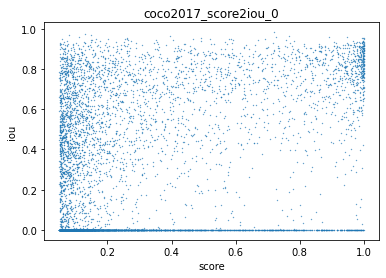

In [52]:
valid_inds = val2017_scores > 0.0
plt.scatter(val2017_scores[valid_inds], val2017_ious[valid_inds], s=0.1)
plt.xlabel("score")
plt.ylabel("iou")
plt.title("coco2017_score2iou_0")

Text(0.5, 1.0, 'coco2017_logthrscore2iou_0')

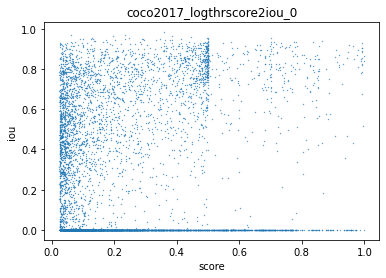

In [56]:
valid_inds = (val2017_logthr_9_scores < 2)

plt.scatter(val2017_logthr_9_scores[valid_inds]/2, val2017_ious[valid_inds], s=0.1)
plt.xlabel("score")
plt.ylabel("iou")
plt.title("coco2017_logthrscore2iou_0")

Text(0.5, 1.0, 'coco2017_areathrscore2iou_0')

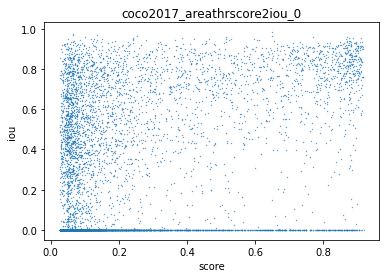

In [58]:
valid_inds = (val2017_areathr_9_scores < 2)
plt.scatter(val2017_areathr_9_scores[valid_inds]/2, val2017_ious[valid_inds], s=0.1)
plt.xlabel("score")
plt.ylabel("iou")
plt.title("coco2017_areathrscore2iou_0")

Text(0.5, 1.0, 'coco2017_arealogthrscore2iou_0')

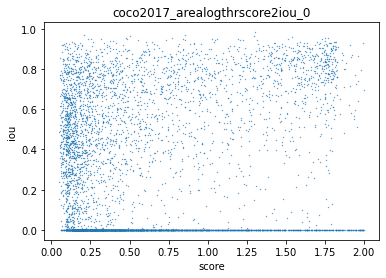

In [59]:
valid_inds = (val2017_arealogthr_9_scores <= 2)
plt.scatter(val2017_arealogthr_9_scores[valid_inds], val2017_ious[valid_inds], s=0.1)
plt.xlabel("score")
plt.ylabel("iou")
plt.title("coco2017_arealogthrscore2iou_0")

In [60]:
bin_num = 10
iou_scores_false_list = []
iou_scores_true_list =[]
iou_scores_fuzzy_list = []

for j in range(bin_num):
    score_inds = ((j/bin_num) < val2017_scores ) & (val2017_scores < ((j+1)/bin_num))
    iou_scores = val2017_ious[score_inds]
    iou_scores_false = sum(iou_scores == 0) / len(iou_scores)
    iou_scores_true = sum(iou_scores > 0.5) / len(iou_scores)
    iou_scores_fuzzy = 1 - iou_scores_false - iou_scores_true
    iou_scores_false_list.append(iou_scores_false)
    iou_scores_true_list.append(iou_scores_true)
    iou_scores_fuzzy_list.append(iou_scores_fuzzy)


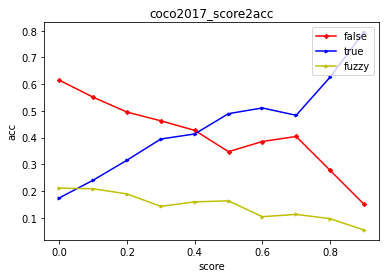

In [61]:
x = [b/bin_num for b in range(bin_num)]

plt.plot(x, iou_scores_false_list, "r", marker='D', markersize=3, label='false')
plt.plot(x, iou_scores_true_list, "b", marker='>', markersize=3, label='true')
plt.plot(x, iou_scores_fuzzy_list, "y", marker='>', markersize=3, label='fuzzy')


plt.xlabel("score")
plt.ylabel("acc")
plt.title("coco2017_score2acc")


plt.legend(loc="upper right")
# plt.savefig("1.jpg")
plt.show()